

# Project: Investigate a Dataset - TMDb MOVIE DATA

> The primary goal of this project is to go through the dataset and the general data analysis process using numpy, pandas, seaborn and matplotlib.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Import packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='intro'></a>
## Introduction

### Dataset Description  

> The TMDb movie data set contains information of about 10,866 movies collected from The Movie Database (TMDb), from year 1960 to 2015. Information captured about each movie in this dataset includes; movie ID (id), TMDb movie ID (imdb_id), movie popularity (popularity), recorded movie budget (budget), revenue realised from movie (revenue), original title of the movie (original_title), star movie cast (cast), movie homepage (homepage), movie director	(director), movie tagline (tagline), movie keywords (keywords), movie overview (overview), movie runtime (runtime), movie genres (genres), production companies involved in movie production (production_companies), official movie release date (release_date), total number of votes by movie viewers on the movie (vote_count), average vote rating of movie (vote_average),	year movie was released (release_year), budget on movie adjusted in terms of 2010 dollars, accounting for inflation over time (budget_adj),  movie revenue adjusted in terms of 2010 dollars, accounting for inflation over time (revenue_adj). This information was captured in 21 columns in the TMDb movie data set, using label names as shown in parentheses above.


### Questions for Analysis

> In this presentation, answers to the underlisted questions will be provided based on insights from exploratory analysis carried out on the TmDb movie data;
- 1. Over the years, since 1960 till recent times, what has movie production been like in terms of number of movies released?
- 2. In what year was movies released the most, and how many released movie?
- 3. In what year was least number of movies released, and how many released movie?
- 4. What factors or features influences the revenue of a movie, and in what way(s)?
- 5. Over the years, since 1960 till recent times, what movie genre has been the most popular?
- 6. What genre combination will movie lovers be more than willing to see?
- 7. For an investor who wants to invest in a very successful movie, what genre of movie should he/she invest in, and what factors should be cosidered and what numbers should be targeted?

In [2]:
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas


Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling
> A quick look at the dataset reveals that the dataset needs some cleaning. Records with missing feature data will be kept in the dataset for as long as technically possible so as keep analysis and insights provided by this report at a high accuracy. Removal or replacement of any data will be based on thorough investigation of the record in question.

### General Properties

#### __Reading the Data:__

In [3]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The first five rows from our dataset reveals the following;
- The "id" column uniquely identify a movie on each row
- The revenue and budget column did not specify which currency was used. For this analysis, we will assume and use the U.S Dollars as currency.
- The dataframe obviously needs some cleansing. Data cleaning will be done as we progress in the analysis.

In [4]:
# Printing the dataframe dimension
df.shape

(10866, 21)


> Dataframe contains 10,866 rows and 21 columns.

__Descriptive Statistics__

In [5]:
# print a summary statistics of dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> A brief statistics from the table above reveals that some movies had zero popularity, zero budget, zero revenue and zero runtime. We will dig deeper in subsequent cells to figure out the circumstances surrounding these zero values. Results from these observations will decide what to do with those records; whether to fill those enteries with null or to drop them outrightly.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

> In this section, all the necessary data cleaning will be done in a very timely manner so as to keep the accuracy of my analysis as high as practicably possible.
> Certain columns are not needed for this analysis and will thus be dropped.
> Duplicate records will be dropped.
> Zero values will be thoroughly investigated and only steps necessary for maintaining good analysis accuracy will be taken

__Investigate the zero entries in the budget and revenue column__
> First, let's investigate the budget and revenue coulumns. Let's analyze those zero values, to know if they should be dropped or populated with null. These two columns are very critical to this report.

In [6]:
# query budget column for zero values
df.query('budget == 0')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


> From the table above, there are 5,696 movies with zero budget.
> Rows with index number 30 and 36 shows cases where budget=0 but revenue=29,355,203 USD and 22,354,572 USD respectively. It's not possible for a movie to amass such revenue with zero budget.
> Subsequent rows on the budget column shows cases where both revenue and budget equals zero. But what is most surprising is that, in all of those cases, there are release date, release year, vote count, vote average and populrity recorded.

> The valid assumption here is that, those movies were actually released, but the budget and/or the revenue information wasn't available as at the time of entry into the movies database.
> Consequently, these movies with zero revenue and/or budget will only be considered when answering questions on the total movies released every year. They will be dropped after that stage as they will not be needed in subsequent analysis.

In [7]:
# query revenue column for zero values
df.query('revenue == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


> This table only confirms our findings in the previous table. Same assumption thus applies.

In [8]:
# information on dataframe columns and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

__Drop columns unnecessary for this analysis__
> The following features are not needed for my analysis; imdb_id, cast, homepage, tagline, overview, production_companies, budget_adj, keywords, and revenue_adj.

And will thus be dropped in cell below

In [9]:
# drop columns
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [10]:
# confirm dropped features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1018.8+ KB


__Change datatype__
> We can see from above information that the release_date feature is in the wrong format.

In the cell below, release_date feature will be converted from object to datetime

In [11]:
# convert release_date column datatype to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   director        10822 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1018.8+ KB


__Check for duplicates and remove, if any__
> Duplicates are cases of double entry and should always be removed from the dataset

In [12]:
#check the dataframe for duplicates
df.duplicated().sum()

1

> There is one duplicate record in our dataset. We delete

In [13]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

# confirm duplicate dropped
df.duplicated().sum()

0

> No more duplicate in the dataset.

__Check dataset again for areas that need cleansing__

In [14]:
# information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   director        10821 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


> From the information above, we can see that our dataset has missing values in the director and genres columns. We need to drop them later in our analysis. We cant drop them right now because we need them in order to make the answer we provide to certain questions more accurate.

__Another quick look at the dataframe__

In [15]:
# view first 5 rows of the dataframe
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


> The dataset looks clean and good for exploratory data analysis.
> The genres column will be split into individual genre after answering the first, second and third research questions.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Over the years, since 1960 till recent times, what has movie production been like in terms of number of movies released?

    > To provide accurate answer to this question, every movie with a release date MUST be included in the data. This justifies my decision to allow the movies with zero budget and zero revenue to remain in the dataset, at least for now.
    
    > My approach to answering this question is to count each and every movie "id" and group them by their respective release year. Count by "id" is the ideal count approach because the "id" column uniquely identifies each movie.
    > Visualization by bar chart of the above query will then be plotted, to visalize the trend.

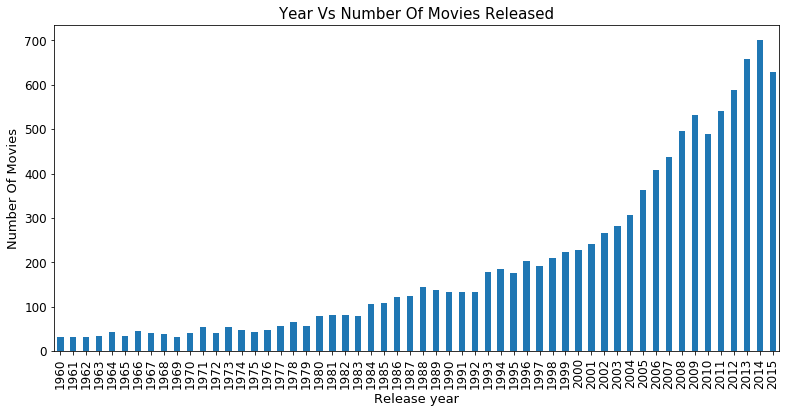

In [16]:
# groupby release year and count "id"
df.groupby('release_year').count()['id'].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels to see how movies have been released over the years in terms of numbers
plt.title("Year Vs Number Of Movies Released",fontsize=15)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

> Above visualization shows that number of movie production/release used to be very low and wasn't really increasing between years 1960 to 1970. Between 1980 to 1992, it is observed that number of release increseased relatively. Between 1993 till 2015, movie release increased massively and peaked at year 2014.

### Research Question 2: In what year was movies released the most, and how many released movie?

> To answer this question, the year with the maximum count "id" from our groupby query is needed together with the count result.


In [17]:
# groupby release year and count "id". Then save in a variable called "release_year_counter"
release_year_counter = df.groupby('release_year').size().reset_index(name='count')

# find year with maximum count
release_year_counter.loc[release_year_counter['count'].idxmax()]

release_year    2014
count            700
Name: 54, dtype: int64

> Year 2014 recorded the highest number of release with 700 movies released.

### Research Question 3: In what year was least number of movies released, and how many released movie?

> To answer this question, the year with the minimum count "id" from our groupby query is needed together with the count result.

In [18]:
# find year with minimum count
release_year_counter.loc[release_year_counter['count'].idxmin()]

release_year    1961
count             31
Name: 1, dtype: int64

Year 1961 recorded the least number of release with 31 movies released.

> Answers to questions 2 and 3 is very much in line to analysis in answering question 1; there has been increased movie production between 1961 till date.

### Final Data Cleaning

> Having answered questions 1, 2 and 3, subsequent questions are focused on budget and revenue of released movies.
> At this point, we can no longer keep movies with no record of revenue and budget in our dataframe. The next steps will remove zero values in the revenue and budget columns. After this, other NaN values in other columns will be investigated and investigation results will determine if they should remain in the dataset or not.

But first, let's take a holistic view of the numeric values in the dataset.

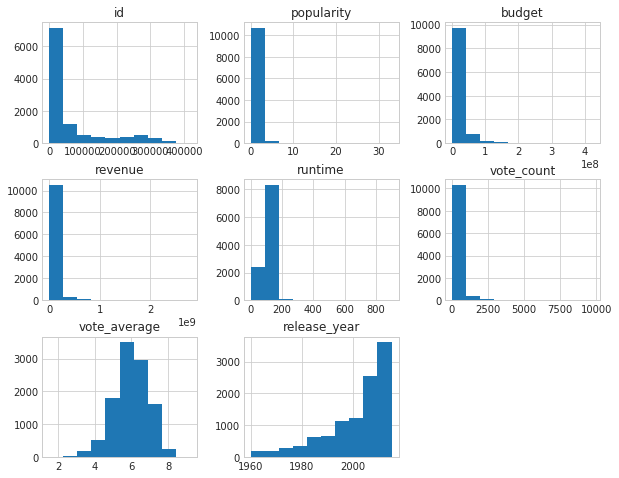

In [19]:
# a quick look at the numeric values in the dataset
df.hist(figsize=(10,8));

> we see lots of zero values in our dataset in columns; "id", "popularity", "budget", "revenue", "vote count", and a few in "runtime". We can quickly deduce that more than 50% of the recorded movies has zero values.
> The charts also tells us that all these zero values in all the columns is very much related to the zeros in the revenue and budget columns.
> We have to remove those movies with zero revenue and those with zero budget from the dataset. 

But first, let's create another copy of the current dataframe and make those changes in the new copy of the dataframe. We just might need the current copy in the future. :)

In [20]:
# create another copy of the original dataframe for further analysis
df1 = df.copy()

In [21]:
# confirm that a new copy has been created
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   director        10821 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [22]:
# drop rows with budget=0
df1 = df1[df1.budget !=0]

# drop rows with revenue=0
df1 = df1[df1.revenue !=0]

In [23]:
# confirm changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   int64         
 4   original_title  3854 non-null   object        
 5   director        3853 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   vote_count      3854 non-null   int64         
 10  vote_average    3854 non-null   float64       
 11  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 391.4+ KB


> Dataset has dropped by close to 70%. This will definitely reduce the accuracy of our report but leaving those zeros in the dataset will drastically reduce the accuracy of our report by a very alarming margin.

Another look at the information above, shows one missing value in the "director" column. Let's take a look at it!

In [24]:
# returns the missing value in the "director" column
df1[df1['director'].isna()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
3276,15467,0.147657,4180000,11000000,Kismat Konnection,NaN,153,Drama|Comedy|Romance|Foreign,2008-07-18,11,5.8,2008


> As we already know, this row contains a missing value.
> But apart from the "NaN" in the "director column", every other feature in this entry looks great! All the critical information for our report is very much available here!

For this reason, we will be keeping this movie entry but replacing the "NaN" with "unknown"

In [25]:
# replace NaN with "unknown"
df1.fillna('unknown', inplace=True)

# confirm changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   int64         
 4   original_title  3854 non-null   object        
 5   director        3854 non-null   object        
 6   runtime         3854 non-null   int64         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   vote_count      3854 non-null   int64         
 10  vote_average    3854 non-null   float64       
 11  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 391.4+ KB


> Problem fixed!

### Research Question 4: What factors or features influences the revenue of a movie, and in what way(s)?

> To answer this question, we have to pair each numeric column in the dataframe with the revenue column, plot a graph of the pair and find the correlation. Exemptions to this exercise are the following columns: "id", "release_date" and "release_year".

Let's take a quick look at the dataframe.

In [26]:
# first five rows of the dataframe
df1.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


__1. Budget Vs Revenue__

0.6885561524636783

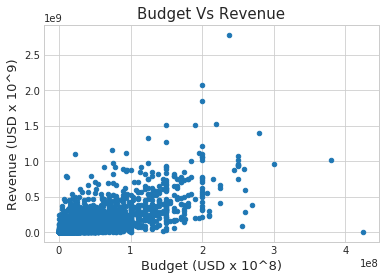

In [27]:
# plot scatterplot
df1.plot(x="budget",y="revenue",kind="scatter");

#setup the title and the labels 
plt.title("Budget Vs Revenue",fontsize=15)
plt.xlabel('Budget (USD x 10^8)',fontsize = 13)
plt.ylabel("Revenue (USD x 10^9)",fontsize= 13)
sns.set_style("whitegrid")

# find correlation
df1.corr().loc['budget','revenue']

> From the scatter plot above, we see a strong correlation between budget and revenue. An increase in budget will most likely result to an increased revenue.

> The correlation value is 0.6885561524636783

0.6885561524636783

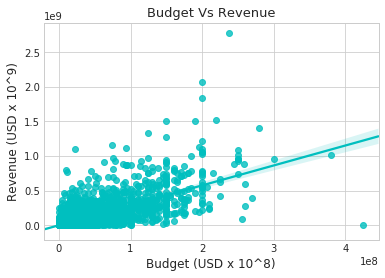

In [28]:
# define a function to make regression plot
ax = sns.regplot(x=df1['budget'], y=df1['revenue'],color='c')
def makereg(ax, xlabel, ylabel, title):
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=13)
    sns.set(rc={'figure.figsize':(6,4)})
    sns.set_style("whitegrid")

# make a regression plot
makereg(ax, 'Budget (USD x 10^8)', 'Revenue (USD x 10^9)', 'Budget Vs Revenue')

# find correlation
df1.corr().loc['budget','revenue']

> From the regression plot above, we see a strong correlation between budget and revenue. An increase in budget will most likely result to an increased revenue. The regression line has a steep slope, showing good relationship between budget and revenue 

> The correlation value is 0.6885561524636783. This shows a good correlation between budget and revenue.

__2. Popularity Vs Revenue__

0.6155346545546593

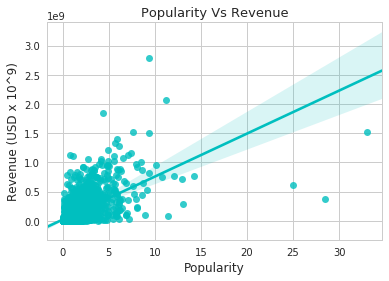

In [29]:
# make regression plot
ax = sns.regplot(x=df1['popularity'], y=df1['revenue'],color='c')
makereg(ax, 'Popularity', 'Revenue (USD x 10^9)', 'Popularity Vs Revenue')

# find correlation
df1.corr().loc['popularity','revenue']

> From the regression plot above, we see a strong correlation between popularity and revenue. An increase in popularity of the movie will most likely result to an increased revenue. The regression line has a steep slope, showing good relationship between popularity and revenue 

> The correlation value is 0.6155346545546593. This shows a good correlation between popularity and revenue.

__3. Runtime Vs Revenue__

0.2502983488743372

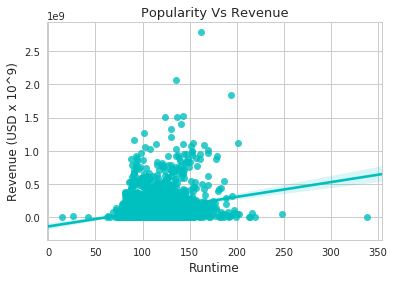

In [30]:
# make regression plot
ax = sns.regplot(x=df1['runtime'], y=df1['revenue'],color='c')
makereg(ax, 'Runtime', 'Revenue (USD x 10^9)', 'Popularity Vs Revenue')

# find correlation
df1.corr().loc['runtime','revenue']

> From the regression plot above, we see a relatively weak correlation between runtime and revenue. This shows that movie runtime has little effect on the movie revenue. Perhaps, movie lovers shows much more interest in other features than the runtime of the movie.

> The correlation value is 0.2502983488743372. This shows a weak correlation between runtime and revenue.

__4. Vote Count Vs Revenue__

0.7545665575489404

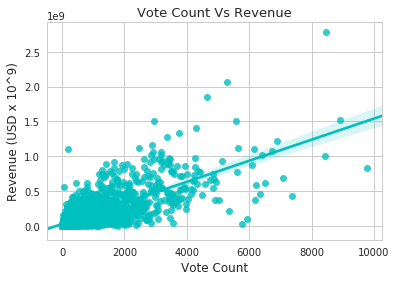

In [31]:
# make regression plot
ax = sns.regplot(x=df1['vote_count'], y=df1['revenue'],color='c')
makereg(ax, 'Vote Count', 'Revenue (USD x 10^9)', 'Vote Count Vs Revenue')

# find correlation
df1.corr().loc['vote_count','revenue']

> From the regression plot above, we see a strong correlation between vote count and revenue. An increase in vote count will most likely result to an increased revenue. The regression line has a steep slope, showing good relationship between vote count and revenue 

> The correlation value is 0.7545665575489404. This shows a good correlation between vote count and revenue.

__5. Vote Average Vs Revenue__

0.2271227757016823

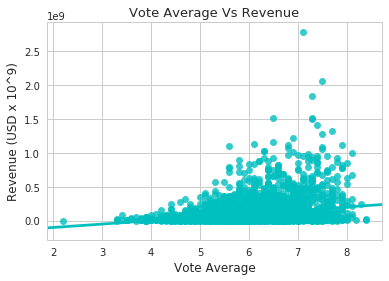

In [32]:
# make regression plot
ax = sns.regplot(x=df1['vote_average'], y=df1['revenue'],color='c')
makereg(ax, 'Vote Average', 'Revenue (USD x 10^9)', 'Vote Average Vs Revenue')

# find correlation
df1.corr().loc['vote_average','revenue']

> From the regression plot above, we see a relatively weak correlation between vote average and revenue.

> The correlation value is 0.2271227757016823. This shows a weak correlation between vote average and revenue.

__6. Vote Count Vs Popularity__

> Now, let's check for relationship between vote count and popularity

0.7800957053210107

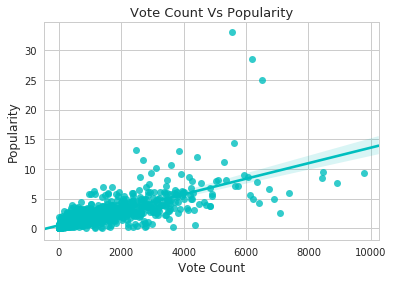

In [33]:
# make regression plot
ax = sns.regplot(x=df1['vote_count'], y=df1['popularity'],color='c')
makereg(ax, 'Vote Count', 'Popularity', 'Vote Count Vs Popularity')

# find correlation
df1.corr().loc['vote_count','popularity']

> From the regression plot above, we see a strong correlation between vote count and popularity. An increase in vote count would imply that the movie is more popular. This is even a valid logic statement.

> The correlation value is 0.7800957053210107. This shows a good correlation between vote count and popularity.

__7. Vote Average Vs Popularity__

0.31786616572270054

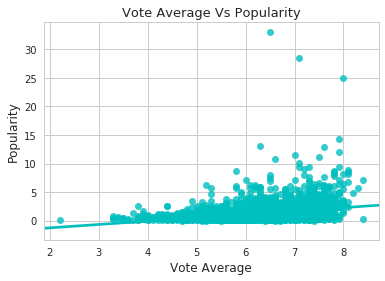

In [34]:
# make regression plot
ax = sns.regplot(x=df1['vote_average'], y=df1['popularity'],color='c')
makereg(ax, 'Vote Average', 'Popularity', 'Vote Average Vs Popularity')

# find correlation
df1.corr().loc['vote_average','popularity']

> From the regression plot above, we see a  relatively weak correlation between vote average and popularity..

> The correlation value is 0.31786616572270054. This shows a relatively weak correlation between vote average and popularity.

__8. Budget Vs Profit__

> Here, we want to know the relationship between budget and profit.

Currently, there is no profit column in the database, so we have to create one before we can proceed to find the relationship between bugdet and profit.

In [35]:
# create a column named "profit" by finding the difference between revenue and budget
df1['profit'] = df1['revenue'] - df1['budget']

# to confirm changes
df1.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


0.5268176539924057

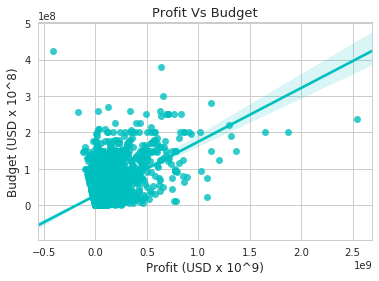

In [36]:
# make regression plot
ax = sns.regplot(x=df1['profit'], y=df1['budget'],color='c')
makereg(ax, 'Profit (USD x 10^9)', 'Budget (USD x 10^8)', 'Profit Vs Budget')

# find correlation
df1.corr().loc['profit','budget']

> From the regression plot above, we see a strong correlation between budget and profit. An increased budget with other features in shape would most likely yield an increased profit.

> The correlation value is 0.5268176539924057. This shows a good correlation between budget and profit.

__9. Profit Vs Popularity__

0.5962013674920551

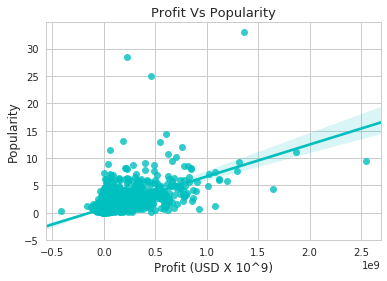

In [37]:
# make regression plot
ax = sns.regplot(x=df1['profit'], y=df1['popularity'],color='c')
makereg(ax, 'Profit (USD X 10^9)', 'Popularity', 'Profit Vs Popularity')

# find correlation
df1.corr().loc['profit','popularity']

> From the regression plot above, we see a strong correlation between popularity and profit. An increased popularity will most likely increase chances of an increased profit.

> The correlation value is 0.5962013674920551. This shows a good correlation between movie popularity and profit.

> Having compared all the relevant numeric features in the dataset with revenue, the following deductions can be made;
- The revenue of a movie has strong correlation with the folowing features; budget, popularity and vote count of a movie.
- The revenue of a movie has a weak correlation with the average vote and runtime of a movie.

### Research Question 5: Over the years, since 1960 till recent times, what movie genre has been the most popular?

> To answer this question, entries in the genre column will have to be put in a better shape. Most movies comes in a combination of genres, and that is how the original dataset was set up.
> To accurately answer this particular research question, each data in the genre column will have to be split into single genre. Cuurently, each movie genres is combined by pipes (i.e. "|"). We'll have to split the data inbetween those pipes into new rows such that these data retain every other feature from the parent row.

But first, a new copy of the current dataframe will be made. And all these changes will be made on the clone

In [38]:
# make a copy of the current dataset
df2 = df1.copy()

# view first five rows of the dataframe
df2.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


In [39]:
# split each genre combination into a list
df2['genres'] = df2['genres'].str.split('|')

In [40]:
# explode each genre list member into a new row and change indexing of the dataframe
df2_explode = df2.explode('genres', ignore_index=True)

# view first five rows of the dataframe
df2_explode.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1363528810
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1363528810
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1363528810
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1363528810
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,228436354


> Dataset looks great!

Now, let's see how many genres we have in the dataset

In [41]:
# see how many unique values in the genres column
df2_explode['genres'].nunique()


20

> There are 20 unique genres in the dataset.

To answer this research question, we'll have to create a dataframe with all the movies grouped into release years, and then, create another dataframe from the resulting dataframe by sorting movie genre with most popularity in each release year. And then a bar chart of the final dataframe will be plotted.

In [42]:
# create a dataframe grouped by "release_year" and "genre" and the mean of every other numeric feature
# store this dataframe in another variable named "genre_yearly_mean"
genre_yearly_mean = df2_explode.groupby(['release_year', 'genres'], as_index=False).mean()

# view first 50 rows of the new dataframe
genre_yearly_mean.head(50)

,release_year,genres,id,popularity,budget,revenue,runtime,vote_count,vote_average,profit
0,1960,Action,966.500000,1.504538,7.000000e+06,3.245250e+07,162.500000,217.500000,6.950000,2.545250e+07
1,1960,Adventure,966.000000,1.872132,2.000000e+06,4.905000e+06,128.000000,224.000000,7.000000,2.905000e+06
2,1960,Comedy,9628.500000,0.501564,3.000000e+06,1.605000e+07,108.000000,124.000000,7.550000,1.305000e+07
3,1960,Drama,596.666667,1.564871,5.268983e+06,3.900000e+07,143.666667,542.000000,7.600000,3.373102e+07
4,1960,History,967.000000,1.136943,1.200000e+07,6.000000e+07,197.000000,211.000000,6.900000,4.800000e+07
5,1960,Horror,539.000000,2.610362,8.069480e+05,3.200000e+07,109.000000,1180.000000,8.000000,3.119305e+07
6,1960,Romance,9628.500000,0.501564,3.000000e+06,1.605000e+07,108.000000,124.000000,7.550000,1.305000e+07
7,1960,Thriller,539.000000,2.610362,8.069480e+05,3.200000e+07,109.000000,1180.000000,8.000000,3.119305e+07
8,1960,Western,966.000000,1.872132,2.000000e+06,4.905000e+06,128.000000,224.000000,7.000000,2.905000e+06
9,1961,Action,14779.000000,0.464139,6.000000e+06,1.660000e+07,149.500000,56.000000,6.550000,1.060000e+07


In [43]:
# filter "genre_yearly_mean" dataframe for the movie genre with the maximum popularity each release year
# save the resulting dataframe in a variable named "max_popolarity_yearly_by_genre"
max_popolarity_yearly_by_genre = genre_yearly_mean.groupby('release_year', as_index=False)['genres', 'popularity'].max()

# view the new dataframe
max_popolarity_yearly_by_genre

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,release_year,genres,popularity
0,1960,Western,2.610362
1,1961,Western,2.631987
2,1962,Western,3.170651
3,1963,War,1.586280
4,1964,War,3.153791
5,1965,War,1.910465
6,1966,Western,0.485092
7,1967,War,2.550704
8,1968,Western,1.728887
9,1969,Western,1.778746


> Now, we have the desired dataset and ready for visulization.

But first, a quick look at information about the new dataframe.

In [44]:
max_popolarity_yearly_by_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  56 non-null     int64  
 1   genres        56 non-null     object 
 2   popularity    56 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


> Looks great!

Now let's plot the bar chart. Seaborn will be used for this barchart.

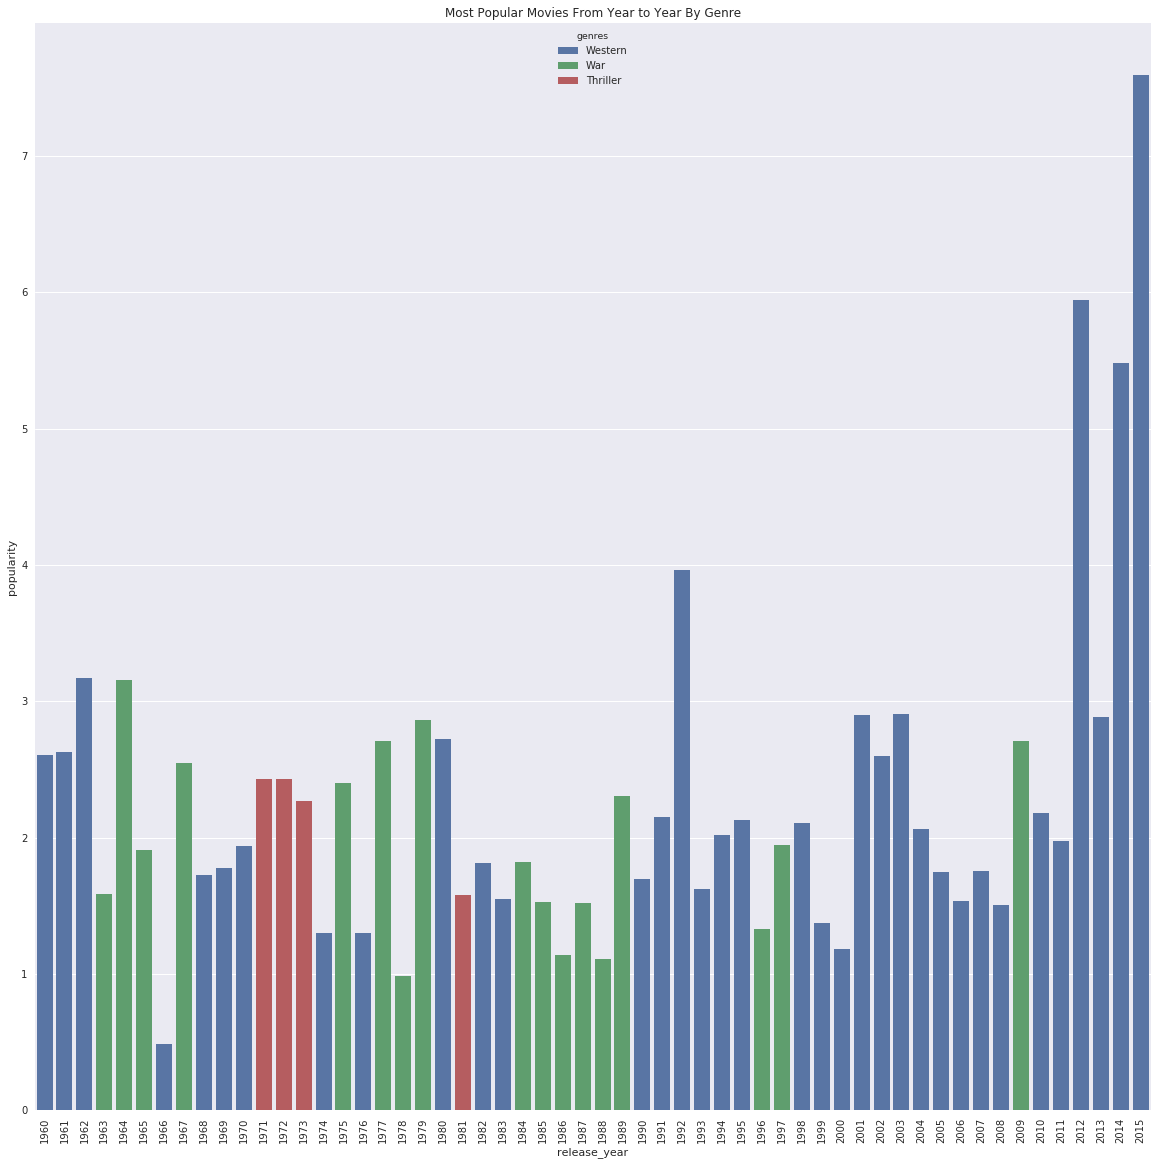

In [47]:
# plot bar chart
by_genre = sns.barplot(x='release_year', y='popularity', hue='genres', data=max_popolarity_yearly_by_genre, dodge=False).set(title='Most Popular Movies From Year to Year By Genre')
sns.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation=90);

In [48]:
max_popolarity_yearly_by_genre.groupby('genres')['popularity'].count()

genres
Thriller     4
War         17
Western     35
Name: popularity, dtype: int64

> Results shows "western" genre as the most popular movie genre, followed by "war" genre, and then "Thriller" genre.

### Research Question 6: What genre combination will movie lovers be more than willing to see?

> The bar chart above shows three movie genres to be the predominantly popular movie genres since 1960 till date.
> "Western|War|Thriller" will definitely be movie lovers' delight anytime!

### Research Question 7: For an investor who wants to invest in a very successful movie, what genre of movie should he/she invest in, and what factors should be cosidered and what numbers should be targeted?

> To answer this question we have to look into the dataframe statistics. This will give an idea on what benchmark and range best defines a "very successful" movie. Since this category is all what the question at hand is centered on, every other groups can be categorized as "not so successful" movie.
> Investors speak only one language, the "money" language. For this reason, we will be categorizing statistics derived from our dataframe into two based on revenue; "very successful" and "not so successful". A dataframe will be created of this, such that, each movie based on the revenue it generated will be tagged as either "very successful" or "not so successful" - this information will be populated in a created column. Then, we'll create another dataframe from this, containing two rows only, where every movie has been grouped by success level (i.e. "very successful" and "not so successful"). This new dataframe will also calculate the mean of all the numeric features in the previous dataframe. These mean value features are the figures that qualify each category as a "very successful" movie or a "not so successful" movie. These mean values should be the target every investor should target to make a very successful movie.

So now, let's begin by looking into the statistics of our current dataset for guidiance 

In [49]:
df2_explode.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10303.000000,10303.000000,1.030300e+04,1.030300e+04,10303.000000,10303.000000,10303.000000,10303.000000,1.030300e+04
mean,36345.654373,1.262140,4.163969e+07,1.196728e+08,109.568572,574.091818,6.156100,2000.921867,7.803313e+07
std,63106.313340,1.607645,4.532367e+07,1.923069e+08,20.354248,940.428711,0.789695,11.277350,1.648993e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,5548.000000,0.476927,1.100000e+07,1.486008e+07,96.000000,76.000000,5.700000,1995.000000,-1.670386e+06
50%,11040.000000,0.843170,2.500000e+07,5.054911e+07,106.000000,225.000000,6.200000,2004.000000,2.098423e+07
75%,34769.000000,1.462242,5.700000e+07,1.410472e+08,119.000000,632.500000,6.700000,2010.000000,9.097391e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


> Looking at the statistics table above, on the revenue column, a range of the 75th percentile revenue and the maximum revenue will be made the target revenue for a very successful movie, while value below this range to the minimum revenue will be called a not so successful movie. This will be the two categoies we'll be working with. The actual information we want is those that relates to the very successful movie category.

So now let's write codes to implement this.

In [50]:
# set bin edges and bin names to define two categories
bin_edges = [2, 141047200, 2781506000]
bin_names = ['not_so_successful', 'very_successful']

# populate the two categories in a new column named success level
df2_explode['success_level'] = pd.cut(df2_explode['revenue'], [2, 141058500, 2781506000], labels=['not_so_successful', 'very_successful'], include_lowest=True)

# view first five rows of the dataframe to confirm that the new column has been created
df2_explode.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,success_level
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1363528810,very_successful
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1363528810,very_successful
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1363528810,very_successful
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1363528810,very_successful
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,228436354,very_successful


In [51]:
# information on the dataset
df2_explode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303 entries, 0 to 10302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10303 non-null  int64         
 1   popularity      10303 non-null  float64       
 2   budget          10303 non-null  int64         
 3   revenue         10303 non-null  int64         
 4   original_title  10303 non-null  object        
 5   director        10303 non-null  object        
 6   runtime         10303 non-null  int64         
 7   genres          10303 non-null  object        
 8   release_date    10303 non-null  datetime64[ns]
 9   vote_count      10303 non-null  int64         
 10  vote_average    10303 non-null  float64       
 11  release_year    10303 non-null  int64         
 12  profit          10303 non-null  int64         
 13  success_level   10303 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(7

Let's save in a variable, a dataset grouped by success level and then calculate the mean values of popularity, budget, revenue, vote count and profit.

In [52]:
success_features = df2_explode.groupby('success_level', as_index=False)['popularity', 'budget', 'revenue', 'vote_count', 'profit'].mean()

# view dataframe
success_features

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,success_level,popularity,budget,revenue,vote_count,profit
0,not_so_successful,0.849317,2.615858e+07,4.111916e+07,269.300078,1.496058e+07
1,very_successful,2.501089,8.810106e+07,3.554253e+08,1488.822136,2.673243e+08


> An investor who wish to invest in a very successful movie must consider the following underlisted features and hit the coresponding mentioned target numbers;
- __1. movie popularity:__ must be at least 2.50
- __2. budget on the movie:__ must not be less 88,101,060 USD
- __3. vote count:__ must target a total movie vote count of about 1,489 and above

When the above targets are met, revenue generated by the said movie is expected to about 355,425,300 USD and above. The profit on the said movie is expected to be 267,324,300 USD and above.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


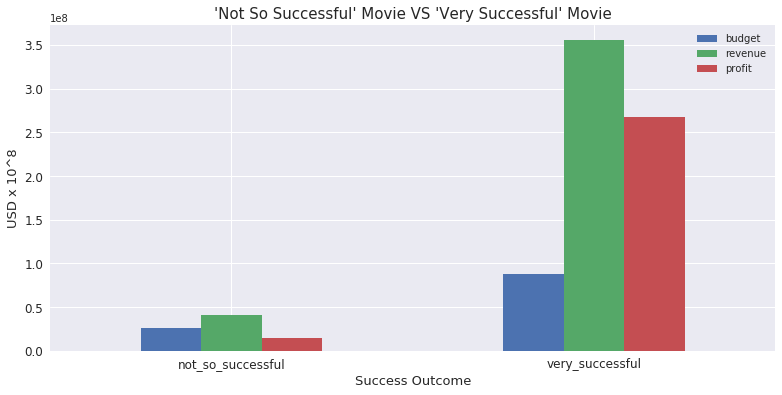

In [53]:
# plot a bar chart of very successul movie and not so successful movie
df2_explode.groupby('success_level')['budget', 'revenue', 'profit'].mean().plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels to see how movies have been released over the years in terms of numbers
plt.title("'Not So Successful' Movie VS 'Very Successful' Movie",fontsize=15)
plt.xlabel('Success Outcome',fontsize = 13)
plt.ylabel("USD x 10^8",fontsize= 13)
plt.xticks(rotation=0)
sns.set_style("whitegrid")

# by_success = df2_explode.groupby('success_level', as_index=False)['budget', 'revenue', 'profit'].mean()
# by_success.plot(kind='bar')
# plt.title('Not So Successful Movie VS Very Successful Movie')
# plt.xlabel('Success Outcome')
# plt.xticks(['not_so_successful', 'very_successful'])

> The above visualization provides at a glance, the contrast between a very successful movie and a not so successful movie. The following can be deduced from the graph above;

> We can see that a not so successful movie, though requires considerably little budget, returned revenue is just a little higher than the budget. But the investor is most likely to run at a loss, considering that the profit on movie is less than the budget. That should be a red flag for any potential investor.

> A very successful movie should be every investors' delight. Though budget is relatively high, but revenue on the movie will be more than times three and half the amount on spent on budget. Also, net profit on movie will be about times three the amount spent on budget.

In [54]:
success_features.to_csv('success_features', index=False)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


The following conclusions can be drawn from my analysis of the TMDb movies data;
- Movie production and total movie released yearly has massively increased over the years since 1960 till 2015, with the total yearly released movies peaking in year 2014 at 700 released movies. The least total number of relesed movie in a year was in 1961, with 31 releaved movie.
- Factors that most likely influence the revenue of a movie include; popularity, budget and vote count. Other features such as average vote and runtime showed weak correlation.
- There are a total of 20 movie genres since 1960 till 2015. The most popular movie genre are Western movie genres, followed by War movie genres, and then, Thriller movie genre.
- Movie lovers' will most likely love to watch a movie with Western|War|Thriller movie genre combination.
-  An investor who wish to invest in a very successful movie must consider the following underlisted features and hit the coresponding mentioned target numbers;
- __1. movie popularity:__ must be at least 2.50
- __2. budget on the movie:__ must not be less 88,101,060 USD
- __3. vote count:__ must target a total movie vote count of about 1,489 and above

When the above targets are met, revenue generated by the said movie is expected to about 355,425,300 USD and above. The profit on the said movie is expected to be 267,324,300 USD and above.

__Limitations__
> In the course of this analysis, certain limitations were encountered which might tend to reduce the accuracy of the insights provided in this report, they include;
- Missing budget and/or revenue data on more than 50% of the movie enteries in the dataset. These records of movies with missing revenue and/or budget data however contributed largely positively to the accuracy of this report regardless, as they remained in the dataset until a point in the analysis where they could no longer provide value to the analysis, only then were they removed from the dataset.
- Though only a case was recorded in the provided dataset, there was a duplicate entry in the dataset, This duplicate entry did not play any part in the analysis as it was remove in the data cleaning phase of our analysis.
- The currency unit of monetary values was not indicated in the dataset. The U.S Dollars, however, was adopted as the currency unit in this report.


In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0